<a href="https://colab.research.google.com/github/Ddilibe/Python-Miniprojects/blob/main/London_weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# London Weather Prection Algorithm


London Weather Data is a dataset created by reconciling measurements of individual weather attribute requests provided by the European Climate Assessment (ECA). The measurements of this particular data set were recorded by a weather station near Heathrow airport in London, England. This data was taken from 1979 to 2021.

The following features are available:
- date = date of recorded measurement
- cloud_cover = cloud cover measurement in octas
- sunshine = sunlight measurement in hours
- global_radiation = radiation measurement in watts per square meter
- max_temp = maximum recorded temperature in degrees Celsius
- mean_temp = average temperature recorded in degrees Celsius
- min_temp = minimum temperature recorded in degrees Celsius
- precipitation = measurement of rainfall/deposition in millimeters
- pressure = measurement of pressure in pascals
- snow_depth = measurement of snow depth in centimeters



# Understanding the Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv('london_weather.csv')

In [ ]:
df.head(10)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
5,19790106,5.0,3.8,39.0,8.3,-0.5,-6.6,0.7,102780.0,1.0
6,19790107,8.0,0.0,13.0,8.5,1.5,-5.3,5.2,102520.0,0.0
7,19790108,8.0,0.1,15.0,5.8,6.9,5.3,0.8,101870.0,0.0
8,19790109,4.0,5.8,50.0,5.2,3.7,1.6,7.2,101170.0,0.0
9,19790110,7.0,1.9,30.0,4.9,3.3,1.4,2.1,98700.0,0.0


In [ ]:
print(df.shape)
df.dtypes

(15341, 10)


date                  int64
cloud_cover         float64
sunshine            float64
global_radiation    float64
max_temp            float64
mean_temp           float64
min_temp            float64
precipitation       float64
pressure            float64
snow_depth          float64
dtype: object

# Data cleaning and preparing

In [ ]:
df.describe()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,1.534100e+04,15322.000000,15341.000000,15322.000000,15335.000000,15305.000000,15339.000000,15335.000000,15337.000000,13900.000000
mean,1.999567e+07,5.268242,4.350238,118.756951,15.388777,11.475511,7.559867,1.668634,101536.605594,0.037986
std,1.212176e+05,2.070072,4.028339,88.898272,6.554754,5.729709,5.326756,3.738540,1049.722604,0.545633
min,1.979010e+07,0.000000,0.000000,8.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000
25%,1.989070e+07,4.000000,0.500000,41.000000,10.500000,7.000000,3.500000,0.000000,100920.000000,0.000000
50%,2.000010e+07,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000
75%,2.010070e+07,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000
max,2.020123e+07,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000


In [ ]:
df.isnull().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [ ]:
df.duplicated().sum()
df = df.dropna()
df.isnull().sum()

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13843 entries, 0 to 14974
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              13843 non-null  int64  
 1   cloud_cover       13843 non-null  float64
 2   sunshine          13843 non-null  float64
 3   global_radiation  13843 non-null  float64
 4   max_temp          13843 non-null  float64
 5   mean_temp         13843 non-null  float64
 6   min_temp          13843 non-null  float64
 7   precipitation     13843 non-null  float64
 8   pressure          13843 non-null  float64
 9   snow_depth        13843 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


# Feature Selection

Due to the high correlation values with sunshine, the prediction would be done with respect to the sunshine.
Using all the variables provided, we will trying to predict the sunshine intensity

<Axes: >

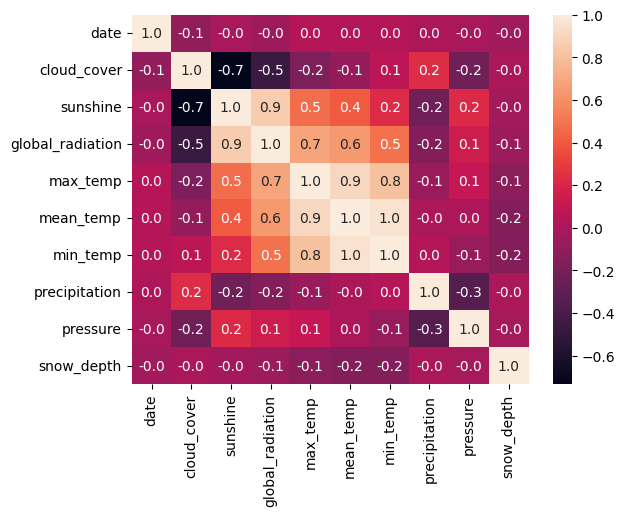

In [ ]:
# plot a correlation matrix
sns.heatmap(df.corr(), annot=True, fmt='.1f')

In [ ]:
x = df[['cloud_cover', 'global_radiation', 'max_temp', 'min_temp', 'mean_temp', 'precipitation', 'pressure', 'snow_depth']]
y = df['sunshine']
x.head(), y.head()

(   cloud_cover  global_radiation  max_temp  min_temp  mean_temp  \
 0          2.0              52.0       2.3      -7.5       -4.1   
 1          6.0              27.0       1.6      -7.5       -2.6   
 2          5.0              13.0       1.3      -7.2       -2.8   
 3          8.0              13.0      -0.3      -6.5       -2.6   
 4          6.0              29.0       5.6      -1.4       -0.8   
 
    precipitation  pressure  snow_depth  
 0            0.4  101900.0         9.0  
 1            0.0  102530.0         8.0  
 2            0.0  102050.0         4.0  
 3            0.0  100840.0         2.0  
 4            0.0  102250.0         1.0  ,
 0    7.0
 1    1.7
 2    0.0
 3    0.0
 4    2.0
 Name: sunshine, dtype: float64)

In [ ]:
# Spliting the data into test and train data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=3)
X_test

,cloud_cover,global_radiation,max_temp,min_temp,mean_temp,precipitation,pressure,snow_depth
1177,2.0,172.0,12.6,1.7,7.4,0.0,103630.0,0.0
14630,7.0,21.0,6.6,-2.2,2.1,5.4,102120.0,0.0
14500,1.0,192.0,18.6,7.7,14.3,0.0,102300.0,0.0
13128,3.0,20.0,8.9,5.4,8.0,10.0,100900.0,0.0
44,6.0,54.0,-0.8,-0.7,-0.2,0.0,99380.0,1.0
...,...,...,...,...,...,...,...,...
847,6.0,155.0,10.4,3.9,7.0,0.1,101550.0,0.0
11273,5.0,38.0,16.5,7.6,11.0,13.8,100020.0,0.0
6936,5.0,15.0,9.1,0.2,4.0,0.2,101100.0,0.0
13181,1.0,20.0,4.4,-3.0,-0.2,0.0,100590.0,0.0


# Normalization and Modelling

## Using Linear Regression Models

In [ ]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Predicting using test data and train data
train = model.predict(X_train)
test = model.predict(X_test)


In [ ]:
# Checking accuracy
print(f"Test: {model.score(X_train, Y_train)}")
print(f"Test: {model.score(X_test, Y_test)}")

Test: 0.8789883641280345
Test: 0.8795071785773008


# Visualization

Visualizing the relationship with sunshine with other relationship

C:\Users\Dilibe\AppData\Local\Temp\ipykernel_4508\2431210988.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Dilibe\AppData\Local\Temp\ipykernel_4508\2431210988.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\Dilibe\Documents\Projects\Quantum\env\lib\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Dilibe\Documents\Projects\Quantum\env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


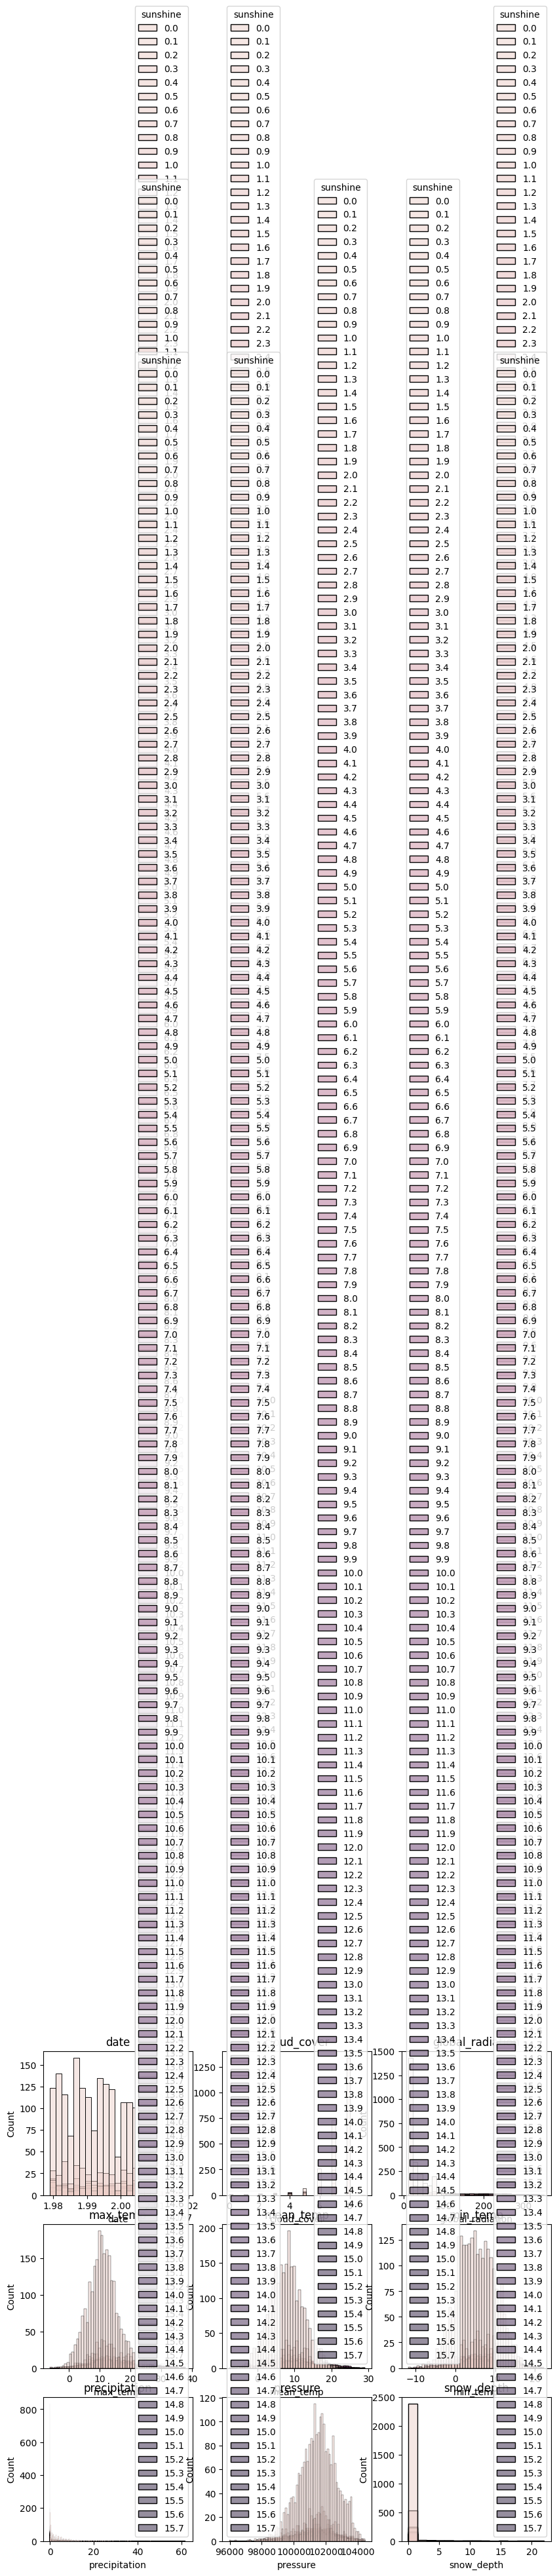

In [ ]:
# creating a scatterplot of all variable
fig = plt.figure(figsize=(10, 20))

cols = np.array(df.columns).tolist()
cols.remove('sunshine')

# for i in range(len(cols)):
    # plt.subplot(6,3,i+1)
    # plt.title(cols[i])
    # sns.histplot(data=df,x=df[cols[i]],hue='sunshine')

plt.tight_layout()

# Conclusion